In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [39]:
data=pd.read_csv("client_data.csv")

In [40]:
data

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0


In [41]:
data.shape

(14606, 26)

In [42]:
data=data[data['cons_12m']!=0]
data=data[data['cons_gas_12m']!=0]
data=data[data['cons_last_month']!=0]
data=data[data['forecast_cons_12m']!=0]
data=data[data['imp_cons']!=0]
data=data[data['margin_gross_pow_ele']!=0]
data=data[data['margin_net_pow_ele']!=0]
data=data[data['net_margin']!=0]
data=data[data['forecast_cons_year']!=0]
data=data[data['forecast_discount_energy']!=0]
data=data[data['forecast_meter_rent_12m']!=0]
data=data[data['forecast_price_energy_peak']!=0]

data.tail(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
11635,818cf5a250067c04a87ff1d068d15c46,foosdfpfkusacimwkcsosbicdxkicaua,74,2061,2,2012-08-08,2017-01-23,2015-11-18,2016-01-24,10.52,...,t,0.32,48.60,48.60,2,4.63,3,lxidpiddsbxsbosboudacockeimpuepw,13.856,0
12987,13d36f527775c0cc144e63e661b00fb6,MISSING,13139,12223,1758,2010-02-16,2016-02-26,2015-02-26,2015-02-18,1726.73,...,t,232.51,64.68,64.68,3,93.93,6,lxidpiddsbxsbosboudacockeimpuepw,18.500,0
13716,61e9428581049a707c2755e96f1ea99e,usilxuppasemubllopkaafesmlibmsdf,1514,19397,99,2012-03-01,2016-07-27,2015-07-27,2015-03-09,184.23,...,t,13.53,43.06,43.06,4,12.43,4,lxidpiddsbxsbosboudacockeimpuepw,15.100,0
14098,a9ed06b84a89c30cfc539a2ff25eae5f,ewpakwlliwisiwduibdlfmalxowmwpci,2189,8237,143,2013-01-18,2016-05-12,2015-05-12,2015-03-29,366.62,...,t,26.60,30.90,30.90,3,20.24,3,lxidpiddsbxsbosboudacockeimpuepw,10.392,0
14323,e8574f98214ef6d8a7162a1337662d99,foosdfpfkusacimwkcsosbicdxkicaua,74661,55261,5405,2013-06-28,2016-06-30,2015-12-05,2015-07-08,9850.29,...,t,698.61,96.16,96.16,2,1115.64,3,lxidpiddsbxsbosboudacockeimpuepw,35.000,1


E:\anaconda new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


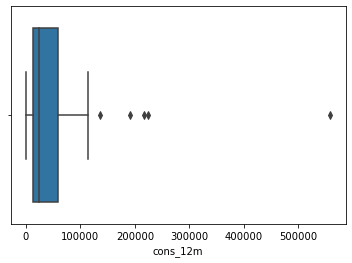

In [43]:
#data['cons_12m'].plot(legend=True)
#data['cons_12m'].duplicated().sum()
sns.boxplot(data['cons_12m'])
data=data

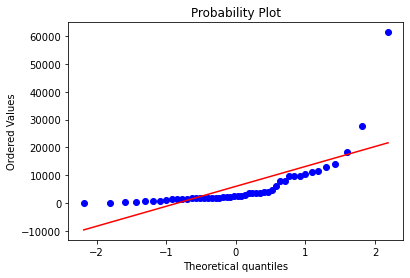

In [44]:
 #data['forecast_cons_12m'].plot(legend=True)

#sns.boxplot(data['cons_12m'])
#sns.kdeplot(data['forecast_cons_12m'])
#plt.hist(data['forecast_cons_12m'], bins=30, density=True, alpha=0.7)
stats.probplot(data['forecast_cons_12m'], dist="norm", plot=plt)

data=data[data['forecast_cons_12m']!=61357.17]
#data['forecast_cons_12m'].max()
#data['forecast_cons_12m']=(data['forecast_cons_12m']!=61357.17)

((array([-2.17970694, -1.80519598, -1.583668  , -1.42038866, -1.28807506,
         -1.17512401, -1.07545654, -0.98546513, -0.90282096, -0.82592578,
         -0.75362993, -0.68507477, -0.61959872, -0.55667825, -0.49588925,
         -0.43688076, -0.37935657, -0.32306189, -0.26777354, -0.21329239,
         -0.15943751, -0.10604146, -0.05294626,  0.        ,  0.05294626,
          0.10604146,  0.15943751,  0.21329239,  0.26777354,  0.32306189,
          0.37935657,  0.43688076,  0.49588925,  0.55667825,  0.61959872,
          0.68507477,  0.75362993,  0.82592578,  0.90282096,  0.98546513,
          1.07545654,  1.17512401,  1.28807506,  1.42038866,  1.583668  ,
          1.80519598,  2.17970694]),
  array([3.20000e-01, 1.35300e+01, 1.85700e+01, 2.66000e+01, 7.78200e+01,
         8.63400e+01, 8.80100e+01, 1.12570e+02, 1.14780e+02, 1.21720e+02,
         1.39910e+02, 1.43950e+02, 1.61750e+02, 1.62310e+02, 1.77790e+02,
         1.89270e+02, 1.96270e+02, 1.97640e+02, 2.06340e+02, 2.32510e+02,
 

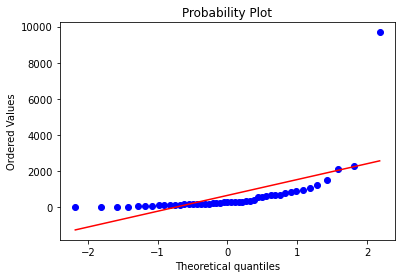

In [45]:
#data['imp_cons'].plot(legend=True)


#sns.boxplot(data['cons_12m'])
stats.probplot(data['imp_cons'],dist="norm",plot=plt)
#data['imp_cons'].unique()
#data['imp_cons'].min()
#sns.displot(data['imp_cons'])


E:\anaconda new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


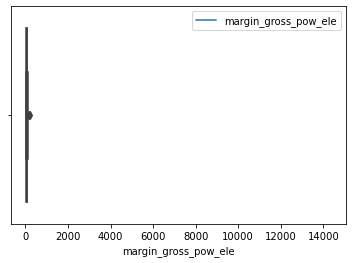

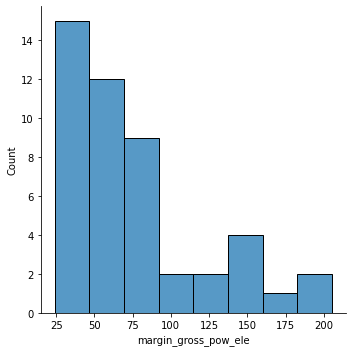

In [46]:
data['margin_gross_pow_ele'].plot(legend=True)

sns.boxplot(data['margin_gross_pow_ele'])


#stats.probplot(data['margin_gross_pow_ele'],dist="norm",plot=plt)
sns.displot(data['margin_gross_pow_ele'])

E:\anaconda new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


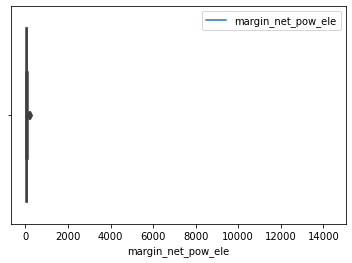

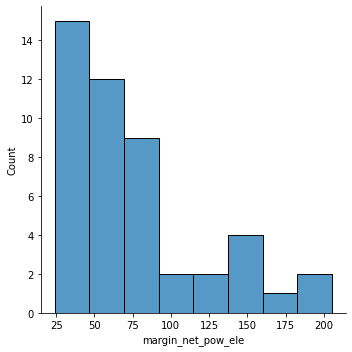

In [47]:
data['margin_net_pow_ele'].plot(legend=True)

sns.boxplot(data['margin_net_pow_ele'])



sns.displot(data['margin_net_pow_ele'])

In [48]:
#data['net_margin']

#sns.displot(data['net_margin'])
#.hist(data['net_margin'],bins=30,density=3 ,alpha=0.7)
p=data['net_margin'].max()

E:\anaconda new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


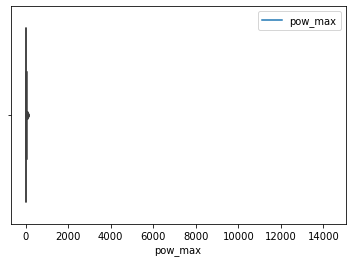

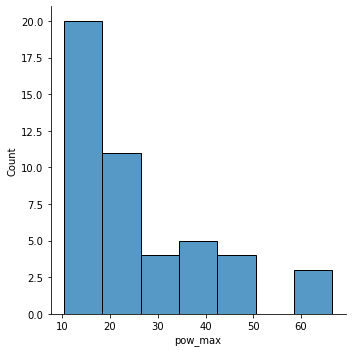

In [49]:
data['pow_max'].plot(legend=True)

sns.boxplot(data['pow_max'])



sns.displot(data['pow_max'])

In [50]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['has_gas']=le.fit_transform(data['has_gas'])
data['nb_prod_act']=le.fit_transform(data['nb_prod_act'])

                                     

In [51]:
price=pd.read_csv('price_data.csv')

In [52]:
corr=data.corr()

In [53]:
corr['churn']

cons_12m                          0.117709
cons_gas_12m                     -0.114640
cons_last_month                  -0.053428
forecast_cons_12m                 0.098074
forecast_cons_year               -0.060684
forecast_discount_energy         -0.095103
forecast_meter_rent_12m           0.276709
forecast_price_energy_off_peak   -0.288904
forecast_price_energy_peak        0.056803
forecast_price_pow_off_peak      -0.237521
has_gas                                NaN
imp_cons                         -0.069907
margin_gross_pow_ele              0.176262
margin_net_pow_ele                0.176262
nb_prod_act                       0.052149
net_margin                        0.266157
num_years_antig                   0.180666
pow_max                           0.183870
churn                             1.000000
Name: churn, dtype: float64

<AxesSubplot:>

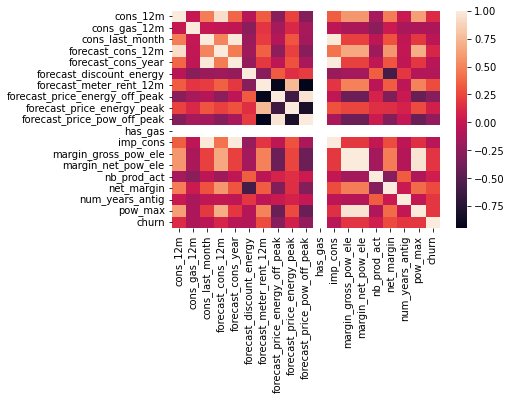

In [54]:
sns.heatmap(data.corr())

In [55]:
price=pd.read_csv('price_data.csv')

In [56]:
price

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


In [57]:
price.columns

Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')

In [58]:
price=price[price['price_mid_peak_fix']!=0]

((array([-4.29681069, -4.0958669 , -3.98649279, ...,  3.98649279,
          4.0958669 ,  4.29681069]),
  array([0.      , 0.      , 0.      , ..., 0.207221, 0.207221, 0.207221])),
 (0.008894387193995228, 0.12274957860172984, 0.9131689556033662))

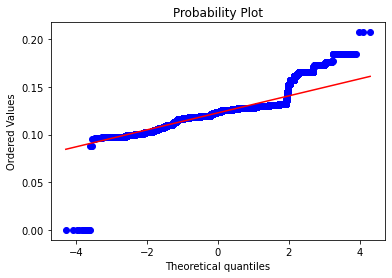

In [59]:
#price['price_off_peak_var'].plot(legend=True)
stats.probplot(price['price_off_peak_var'],dist='norm',plot=plt)

In [60]:
price['price_mid_peak_fix'].count()

80006

In [61]:
price.shape

(80006, 8)

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

data=pd.read_csv("client_data.csv")

price=pd.read_csv('price_data.csv')

churn_data=pd.concat([data,price],axis=1)

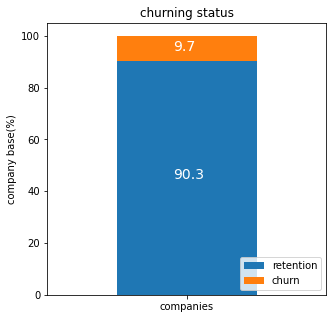

In [63]:
def plot_stacked_bars(dataframe,title_,size_=(18,10),rot_=0,legend_="upper right"):
    """
    plot stacked bars with annotation'
    """
    ax=dataframe.plot(kind="bar",stacked=True,figsize=size_,rot=rot_,title=title_)
    #annotate bars
    annotate_stacked_bars(ax,textsize=14)
    #rename legend
    plt.legend(["retention","churn"],loc=legend_)
    #labels
    plt.ylabel("company base(%)")
    plt.show()
def annotate_stacked_bars(ax,pad=0.99,colour="white",textsize=13):
    """""
    add value annotation to bars
    """""
    #iterate over the plotted rectangles/bars
    for p in ax.patches:
        #calculate annotation
        value=str(round(p.get_height(),1))
        #if value is 0 do not annotate
        if value=='0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+p.get_width()/2)*pad-0.05,(p.get_y()+p.get_height()/2)*pad),
             color=colour,
             size=textsize
            )
churn=data[['id','churn']]
churn.columns=['companies','churn']
churn_total=churn.groupby(churn['churn']).count()
churn_percentage=churn_total/churn_total.sum()*100
plot_stacked_bars(churn_percentage.transpose(),'churning status',(5,5),legend_="lower right")
        

([<matplotlib.patches.Wedge at 0x208a4bf2bb0>,
 [Text(-1.0491617220337908, 0.3305445219922587, 'retention'),
  Text(1.0491616988229293, -0.33054459566446537, 'churn')],
 [Text(-0.5722700302002495, 0.18029701199577744, '90.3%'),
  Text(0.5722700175397796, -0.18029705218061745, '9.7%')])

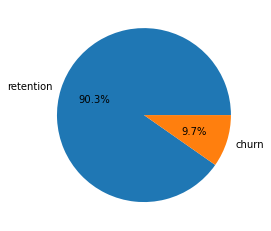

In [64]:
churn_size=sum(churn_data['churn']==0)
retention_size=sum(churn_data['churn']==1)

labels=['retention','churn']
sizes=[churn_size,retention_size]

plt.pie(sizes,labels=labels,autopct='%1.1f%%')

In [65]:
price

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


In [80]:
price['price_date'].unique

<bound method Series.unique of 0         2015-01-01
1         2015-02-01
2         2015-03-01
3         2015-04-01
4         2015-05-01
             ...    
192997    2015-08-01
192998    2015-09-01
192999    2015-10-01
193000    2015-11-01
193001    2015-12-01
Name: price_date, Length: 193002, dtype: object>

In [87]:
price_date=price[(price['price_date']>='2015-01-01') & (price['price_date']<='2015-12-01')]

prices_off_peak=price['price_off_peak_var']+price['price_off_peak_fix']

    
price['prices_off_peak']=prices_off_peak

In [ ]:
jp=jan_price['prices_off_peak'].sum()

In [ ]:
dp=dec_price['prices_off_peak'].sum()

In [110]:
dp-jp

5434.151078430004

In [111]:
price['jan_price']=jan_price
price['dec_price']=dec_price

In [112]:
price

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,prices_off_peak,jan_price,dec_price
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,44.418298,True,False
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,44.418298,False,False
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,44.418298,False,False
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000,44.416557,False,False
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000,44.416557,False,False
...,...,...,...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,40.848801,False,False
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,40.848801,False,False
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,40.848801,False,False
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,40.848801,False,False


In [131]:
churn_data=pd.concat([price,data],axis=1)

In [132]:
churn_data

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,prices_off_peak,jan_price,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,44.418298,True,...,t,0.00,25.44,25.44,2.0,678.99,3.0,lxidpiddsbxsbosboudacockeimpuepw,43.648,1.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,44.418298,False,...,f,0.00,16.38,16.38,1.0,18.89,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,44.418298,False,...,f,0.00,28.60,28.60,1.0,6.60,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000,44.416557,False,...,f,0.00,30.22,30.22,1.0,25.46,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000,44.416557,False,...,f,52.32,44.91,44.91,1.0,47.98,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,40.848801,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,40.848801,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,40.848801,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,40.848801,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
churn_data=churn_data.dropna()

In [152]:
churn_data.corr()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,prices_off_peak,jan_price,dec_price,cons_12m,...,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
price_off_peak_var,1.000000,-0.345713,-0.577211,0.449093,-0.620113,-0.568761,0.452846,0.022585,-0.037519,0.001003,...,-0.005501,-0.006408,-0.007998,-0.006583,-0.006542,0.009707,0.008334,0.012043,0.004505,-0.002989
price_peak_var,-0.345713,1.000000,0.839309,-0.137597,0.816304,0.827004,-0.138932,0.000933,-0.001760,-0.005215,...,-0.000992,0.011052,-0.004107,0.005794,0.005761,-0.001312,-0.010446,-0.023482,-0.000478,0.015419
price_mid_peak_var,-0.577211,0.839309,1.000000,-0.176374,0.977695,0.983278,-0.178716,-0.001373,0.002501,-0.001231,...,0.005360,0.008722,-0.004220,-0.001716,-0.001607,-0.013076,-0.007307,-0.015950,-0.011972,0.003905
price_off_peak_fix,0.449093,-0.137597,-0.176374,1.000000,-0.056058,-0.275687,0.999991,-0.005879,0.009043,-0.009754,...,0.006527,-0.005250,0.001920,-0.006454,-0.006286,0.000824,-0.002191,0.006094,-0.000982,-0.022057
price_peak_fix,-0.620113,0.816304,0.977695,-0.056058,1.000000,0.940066,-0.058857,0.001611,0.001056,-0.003623,...,0.004950,0.009352,-0.002269,-0.002500,-0.002392,-0.012410,-0.008216,-0.014312,-0.012902,-0.000322
price_mid_peak_fix,-0.568761,0.827004,0.983278,-0.275687,0.940066,1.000000,-0.277778,0.001481,0.001033,0.001916,...,0.002638,0.010978,-0.005853,-0.004985,-0.004877,-0.012862,-0.006725,-0.015660,-0.012108,0.006892
prices_off_peak,0.452846,-0.138932,-0.178716,0.999991,-0.058857,-0.277778,1.000000,-0.005760,0.008847,-0.009728,...,0.006487,-0.005269,0.001879,-0.006471,-0.006304,0.000868,-0.002147,0.006137,-0.000958,-0.022025
jan_price,0.022585,0.000933,-0.001373,-0.005879,0.001611,0.001481,-0.005760,1.000000,-0.090855,-0.000681,...,0.009279,-0.006310,0.001084,-0.007749,-0.007711,0.013902,0.005649,0.011331,0.003540,-0.005893
dec_price,-0.037519,-0.001760,0.002501,0.009043,0.001056,0.001033,0.008847,-0.090855,1.000000,-0.000698,...,0.020979,-0.015133,0.022410,-0.002761,-0.002722,0.001020,0.004532,-0.012343,0.016509,-0.003621
cons_12m,0.001003,-0.005215,-0.001231,-0.009754,-0.003623,0.001916,-0.009728,-0.000681,-0.000698,1.000000,...,0.145908,-0.026566,0.159711,-0.011926,-0.011905,0.154251,0.133614,-0.003565,0.082889,-0.045968


In [137]:
churn_data.columns

Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix', 'prices_off_peak', 'jan_price', 'dec_price', 'id',
       'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

In [151]:
x=churn_data.loc[:,['prices_off_peak','jan_price', 'dec_price']]
y=churn_data.loc[:,['churn']]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=98)

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
churn_data['jan_price']=le.fit_transform(churn_data['jan_price'])
churn_data['dec_price']=le.fit_transform(churn_data['dec_price'])

from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)
pred=model.predict(X_test)

from sklearn import metrics
print(metrics.mean_squared_error(y_test,pred),'mse')
print(metrics.mean_absolute_error(y_test,pred),'mae')
print(metrics.accuracy_score(y_test,pred),'accuracy')
print(metrics.r2_score(y_test,pred),'r2_score')


C:\Users\Tanuj\AppData\Local\Temp\ipykernel_6236\2332276911.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data['jan_price']=le.fit_transform(churn_data['jan_price'])
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_6236\2332276911.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data['dec_price']=le.fit_transform(churn_data['dec_price'])
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_6236\2332276911.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

0.09822039698836413 mse
0.09822039698836413 mae
0.9017796030116358 accuracy
-0.1446076992895795 r2_score
